# Build a data catalog for the test data

## Imports

In [1]:
from ecgtools import Builder
from ecgtools.parsers.cesm import parse_cesm_timeseries

## Build the catalog using `parse_cesm_timeseries`

In [2]:
b = Builder(root_path = '../data/')

In [3]:
b.build(parse_cesm_timeseries)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.8s finished


Builder(root_path=PosixPath('../data'), extension='.nc', depth=0, exclude_patterns=None, njobs=-1)

## Inspect the catalog

In [4]:
b.df

,component,stream,case,member_id,variable,start_time,end_time,time_range,long_name,units,vertical_levels,frequency,path
0,ocn,pop.h,b.e20.B1850.f19_g17.test,None,SALT,0001-01,0001-12,000101-000112,Salinity,gram/kilogram,1,month_1,../data/b.e20.B1850.f19_g17.test.pop.h.SALT.00...
1,ocn,pop.h,b.e20.B1850.f19_g17.test,None,TEMP,0001-01,0001-12,000101-000112,Potential Temperature,degC,1,month_1,../data/b.e20.B1850.f19_g17.test.pop.h.TEMP.00...


## Save the Catalog

In [5]:
b.save(
    '../data/test_catalog.csv',
    
    # Column name including filepath
    path_column_name='path',
    # Column name including variables
    variable_column_name='variable',
    # Data file format - could be netcdf or zarr (in this case, netcdf)
    data_format="netcdf",
    # Which attributes to groupby when reading in variables using intake-esm
    groupby_attrs=["component", "stream", "case"],
    # Aggregations which are fed into xarray when reading in data using intake
    aggregations=[
        {'type': 'union', 'attribute_name': 'variable'},
        {
            "type": "join_existing",
            "attribute_name": "time_range",
            "options": {"dim": "time", "coords": "minimal", "compat": "override"},
        }
    ],
)

Saved catalog location: ../data/test_catalog.json and ../data/test_catalog.csv


## Test reading in the catalog

In [6]:
import intake

In [7]:
col = intake.open_esm_datastore('../data/test_catalog.json')

In [8]:
dsets = col.search(variable='TEMP').to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.stream.case'


In [9]:
dsets.keys()

dict_keys(['ocn.pop.h.b.e20.B1850.f19_g17.test'])

In [10]:
ds = dsets['ocn.pop.h.b.e20.B1850.f19_g17.test']

## Visualize the output

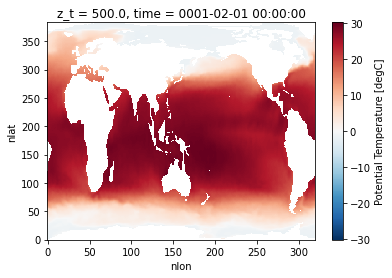

In [11]:
ds.isel(time=0, z_t=0).TEMP.plot()